In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# We're going to use them for better looking prints
class Color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Importing data and checking it superficially with .head()
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

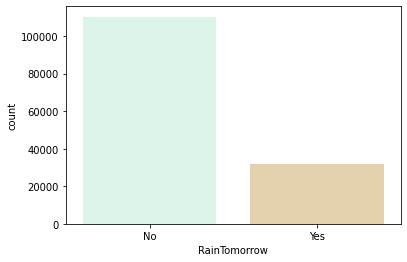

In [4]:
# Plotting number of RainTomorrow values which is our target. 
cols= ["#D9F9E9","#EED4A5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

In [5]:
# Some numeric values
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Our data has 22 columns, hence we can't data preprocessing directly. We should split data to 2 groups as categorical and numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot:>

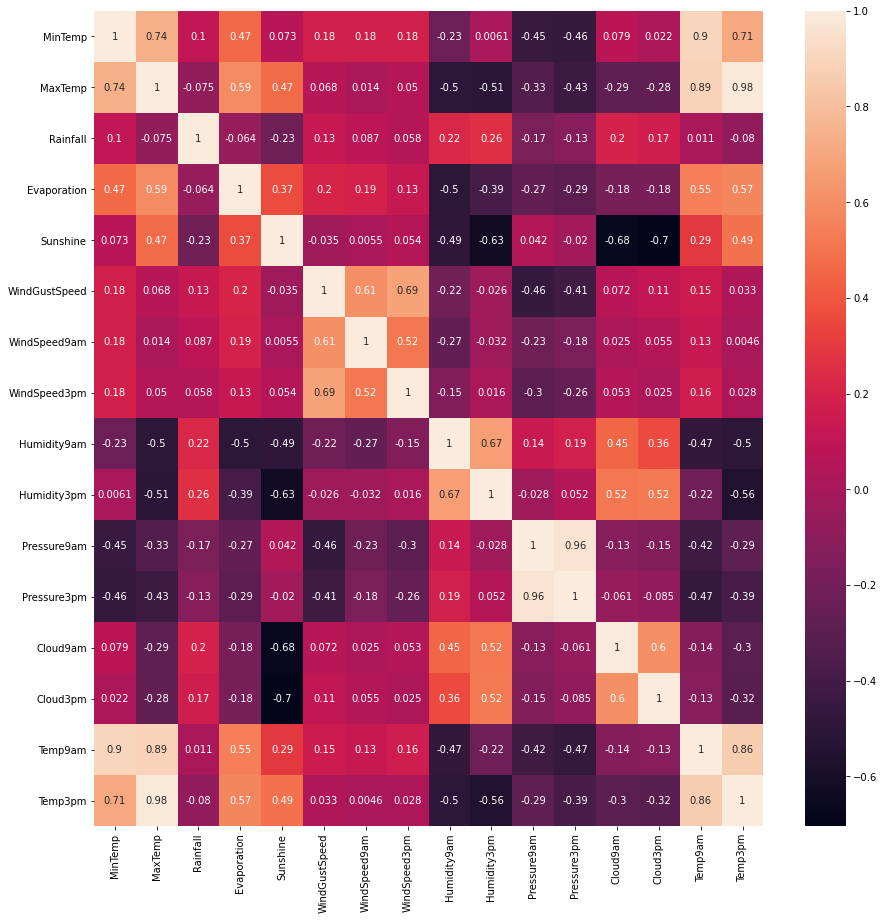

In [7]:
# We need to see value_countslation between values to make better analysis
plt.subplots(figsize=(15,15 ))
sns.heatmap(data.corr(), annot= True, fmt= ".2g")

In [8]:
# Getting categorical data
c = (data.dtypes == object)
object_cols = list(c[c].index)

print(f"Object Columns:{object_cols}")
print("\n")
print(Color.RED + Color.BOLD + "Checking null values" + Color.END)

# Checking null values which in categorical columns
for column_name in object_cols:
    print(f"{column_name} : {data[column_name].isna().sum()}")
    
print("\n")    
# Printing most occuring values in each column which is categorical
print(Color.RED + Color.BOLD + "Most occuring datas" + Color.END)
for column_name in object_cols:
    print(f"{column_name} --> {data[column_name].value_counts().index[0]}")
    
# Filling null values with most common occuring values
for column_name in object_cols:
    data[column_name] = data[column_name].fillna(data[column_name].value_counts().index[0])   

print("\n")    
print(Color.RED + Color.BOLD + "Checking again null values" + Color.END)

# Checking again null values which in categorical columns
for column_name in object_cols:
    print(f"{column_name} : {data[column_name].isna().sum()}")     

Object Columns:['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Checking null values
Date : 0
Location : 0
WindGustDir : 10326
WindDir9am : 10566
WindDir3pm : 4228
RainToday : 3261
RainTomorrow : 3267


Most occuring datas
Date --> 2016-09-01
Location --> Canberra
WindGustDir --> W
WindDir9am --> N
WindDir3pm --> SE
RainToday --> No
RainTomorrow --> No


Checking again null values
Date : 0
Location : 0
WindGustDir : 0
WindDir9am : 0
WindDir3pm : 0
RainToday : 0
RainTomorrow : 0


In [9]:
# Getting numeric data
n = (data.dtypes == "float64")
numeric_cols = list(n[n].index)

print(f"Numeric Columns:{numeric_cols}")
print("\n")
print(Color.RED + Color.BOLD + "Checking null values" + Color.END)

# Checking null values which in numeric columns
for column_name in numeric_cols:
    print(f"{column_name} : {data[column_name].isna().sum()}")

print("\n")

# Calculating mean() value of each columns
print(Color.RED + Color.BOLD + "Mean values of each columns" + Color.END)    
for column_name in numeric_cols:
    print(f"{column_name} --> {data[column_name].mean()}")
    
print("\n")

# Filling null values with mean values
for column_name in numeric_cols:
    data[column_name] = data[column_name].fillna(data[column_name].mean())
    
print(Color.RED + Color.BOLD + "Checking again null values" + Color.END)

# Checking again null values which in numeric columns
for column_name in numeric_cols:
    print(f"{column_name} : {data[column_name].isna().sum()}")      

Numeric Columns:['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Checking null values
MinTemp : 1485
MaxTemp : 1261
Rainfall : 3261
Evaporation : 62790
Sunshine : 69835
WindGustSpeed : 10263
WindSpeed9am : 1767
WindSpeed3pm : 3062
Humidity9am : 2654
Humidity3pm : 4507
Pressure9am : 15065
Pressure3pm : 15028
Cloud9am : 55888
Cloud3pm : 59358
Temp9am : 1767
Temp3pm : 3609


Mean values of each columns
MinTemp --> 12.19403438096871
MaxTemp --> 23.221348275647003
Rainfall --> 2.360918149917032
Evaporation --> 5.468231522922464
Sunshine --> 7.611177520661145
WindGustSpeed --> 40.03523007167319
WindSpeed9am --> 14.043425914971502
WindSpeed3pm --> 18.662656778887342
Humidity9am --> 68.88083133761887
Humidity3pm --> 51.5391158755046
Pressure9am --> 1017.6499397983179
Pressure3pm --> 1015.2558888309775
Cloud9am --> 4.4474612602

In [10]:
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [11]:
data.shape

(145460, 23)

In [12]:
data['Date']= pd.to_datetime(data["Date"])
# Creating a column of year
data['year'] = data.Date.dt.year

In [13]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head(40)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.600000,5.468232,7.611178,W,44.00000,W,...,21.8,No,No,2008,12,-2.449294e-16,1.000000,1,2.012985e-01,0.979530
1,2008-12-02,Albury,7.4,25.1,0.000000,5.468232,7.611178,WNW,44.00000,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.000000,2,3.943559e-01,0.918958
2,2008-12-03,Albury,12.9,25.7,0.000000,5.468232,7.611178,WSW,46.00000,W,...,23.2,No,No,2008,12,-2.449294e-16,1.000000,3,5.712682e-01,0.820763
3,2008-12-04,Albury,9.2,28.0,0.000000,5.468232,7.611178,NE,24.00000,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.000000,4,7.247928e-01,0.688967
4,2008-12-05,Albury,17.5,32.3,1.000000,5.468232,7.611178,W,41.00000,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.000000,5,8.486443e-01,0.528964
5,2008-12-06,Albury,14.6,29.7,0.200000,5.468232,7.611178,WNW,56.00000,W,...,28.9,No,No,2008,12,-2.449294e-16,1.000000,6,9.377521e-01,0.347305
6,2008-12-07,Albury,14.3,25.0,0.000000,5.468232,7.611178,W,50.00000,SW,...,24.6,No,No,2008,12,-2.449294e-16,1.000000,7,9.884683e-01,0.151428
7,2008-12-08,Albury,7.7,26.7,0.000000,5.468232,7.611178,W,35.00000,SSE,...,25.5,No,No,2008,12,-2.449294e-16,1.000000,8,9.987165e-01,-0.050649
8,2008-12-09,Albury,9.7,31.9,0.000000,5.468232,7.611178,NNW,80.00000,SE,...,30.2,No,Yes,2008,12,-2.449294e-16,1.000000,9,9.680771e-01,-0.250653
9,2008-12-10,Albury,13.1,30.1,1.400000,5.468232,7.611178,W,28.00000,S,...,28.2,Yes,No,2008,12,-2.449294e-16,1.000000,10,8.978045e-01,-0.440394


Text(0.5, 0, 'Days In Year')

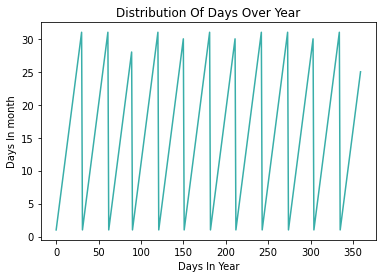

In [14]:
# roughly a year's span section 
section = data[:360] 
tm = section["day"].plot(color="#39AEA9")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

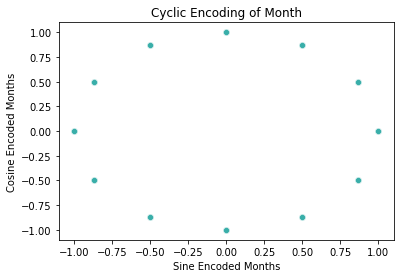

In [15]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#39AEA9")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

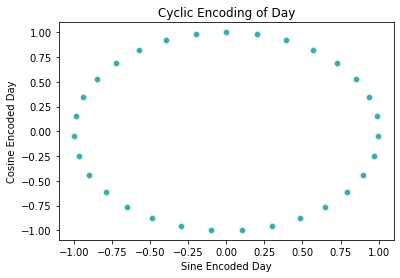

In [16]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#39AEA9")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column_name in object_cols:
    data[column_name] = encoder.fit_transform(data[column_name])
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,396,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,21.8,0,0,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,397,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,24.3,0,0,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,398,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,23.2,0,0,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,399,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,26.5,0,0,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,400,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,29.7,0,0,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


In [18]:
# As you can see, except RainToday; other categorical columns barely affects our model and others are useless too.
# We are going to drop these columns.
data = data.drop(data[["Location","WindGustDir","WindDir9am","WindDir3pm",'Date','day', 'month']], axis= 1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month_sin,month_cos,day_sin,day_cos
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,4.50993,16.9,21.8,0,0,2008,-2.449294e-16,1.0,0.201299,0.979530
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,4.50993,17.2,24.3,0,0,2008,-2.449294e-16,1.0,0.394356,0.918958
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,2.00000,21.0,23.2,0,0,2008,-2.449294e-16,1.0,0.571268,0.820763
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,4.50993,18.1,26.5,0,0,2008,-2.449294e-16,1.0,0.724793,0.688967
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,8.00000,17.8,29.7,0,0,2008,-2.449294e-16,1.0,0.848644,0.528964


In [19]:
target = data["RainTomorrow"]
features = data.drop(data[["RainTomorrow"]], axis=1)

# Scaling Process
from sklearn.preprocessing import StandardScaler
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

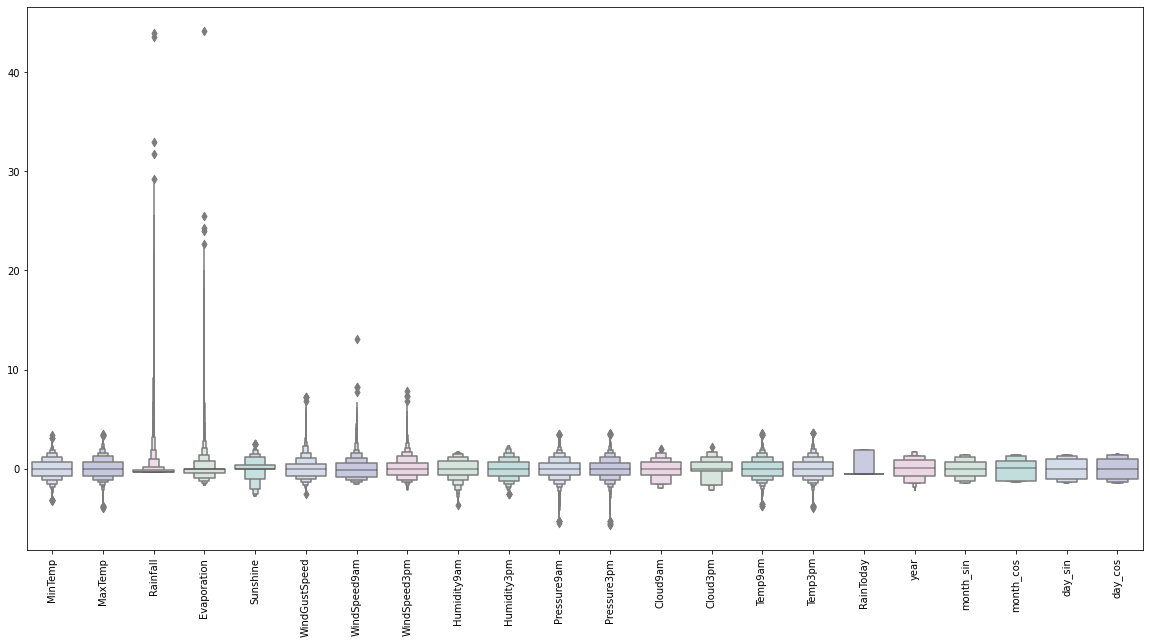

In [20]:
# Detecting outliers
# Looking at the scaled values
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

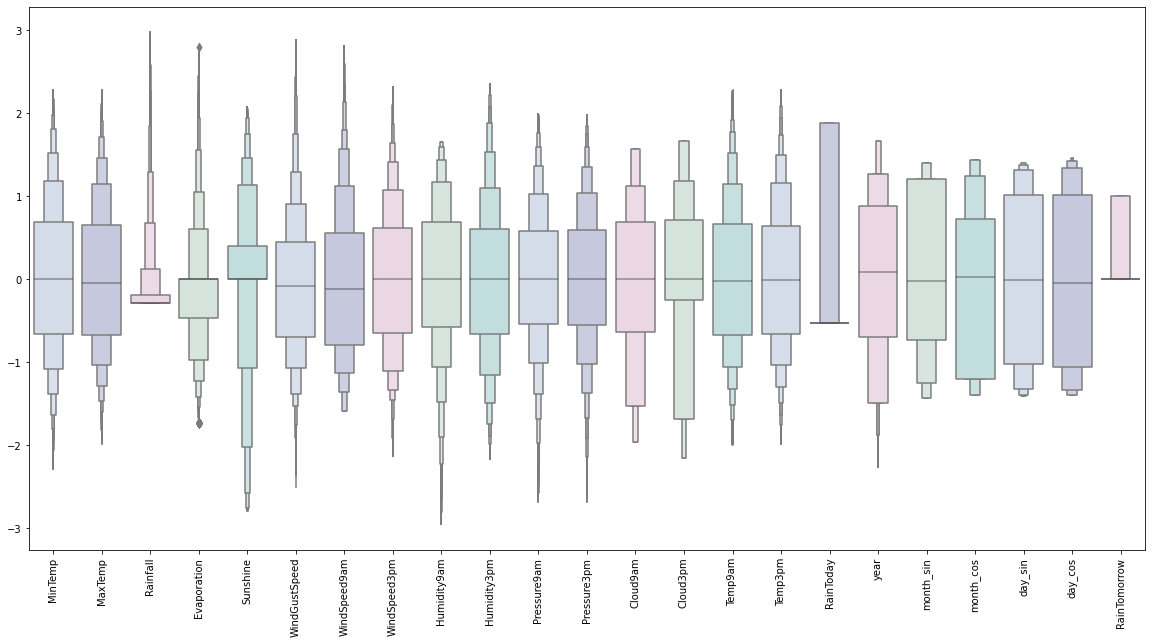

In [21]:
# Full data for
features["RainTomorrow"] = target

# Trimming outliers
features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<3)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<3)&(features["WindGustSpeed"]>-3)]
features = features[(features["WindSpeed9am"]<3)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

# Looking at the trimmed values
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [22]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 64)
X_train.shape

(99856, 22)

In [23]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # "keras.optimizers" doesn't work.

#Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

model = Sequential()

model.add(Dense(units= 22, input_dim= 22, kernel_initializer= "uniform", activation= "relu"))
model.add(Dense(units = 22, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.4685 - accuracy: 0.7903 - val_loss: 0.4014 - val_accuracy: 0.7872
Epoch 2/150
2497/2497 [==============================] - 5s 2ms/step - loss: 0.3996 - accuracy: 0.7904 - val_loss: 0.3885 - val_accuracy: 0.7872
Epoch 3/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3890 - accuracy: 0.8292 - val_loss: 0.3812 - val_accuracy: 0.8427
Epoch 4/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3829 - accuracy: 0.8410 - val_loss: 0.3760 - val_accuracy: 0.8464
Epoch 5/150
2497/2497 [==============================] - 5s 2ms/step - loss: 0.3790 - accuracy: 0.8438 - val_loss: 0.3718 - val_accuracy: 0.8478
Epoch 6/150
2497/2497 [==============================] - 5s 2ms/step - loss: 0.3760 - accuracy: 0.8437 - val_loss: 0.3690 - val_accuracy: 0.8483
Epoch 7/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3734 - accuracy: 0.8439 - val_loss: 0.3666 - val_ac

2497/2497 [==============================] - 6s 2ms/step - loss: 0.3604 - accuracy: 0.8510 - val_loss: 0.3559 - val_accuracy: 0.8490
Epoch 58/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3597 - accuracy: 0.8510 - val_loss: 0.3563 - val_accuracy: 0.8498
Epoch 59/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3606 - accuracy: 0.8507 - val_loss: 0.3560 - val_accuracy: 0.8490
Epoch 60/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3596 - accuracy: 0.8504 - val_loss: 0.3558 - val_accuracy: 0.8484
Epoch 61/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3591 - accuracy: 0.8511 - val_loss: 0.3558 - val_accuracy: 0.8483
Epoch 62/150
2497/2497 [==============================] - 6s 2ms/step - loss: 0.3580 - accuracy: 0.8508 - val_loss: 0.3555 - val_accuracy: 0.8487
Epoch 63/150
2497/2497 [==============================] - 5s 2ms/step - loss: 0.3596 - accuracy: 0.8506 - val_loss: 0.3563 - val_accuracy

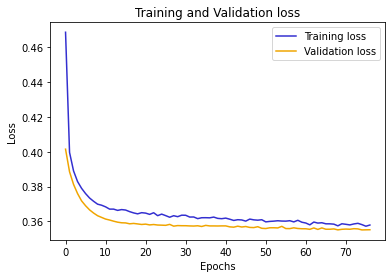

In [24]:
plt.plot(history.history['loss'], "#332FD0", label='Training loss')
plt.plot(history.history['val_loss'],"#F0A500", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

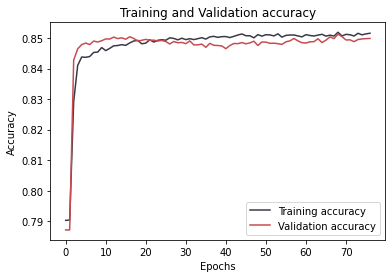

In [25]:
plt.plot(history.history['accuracy'], "#3A3845", label='Training accuracy')
plt.plot(history.history['val_accuracy'], "#C74B50", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

<AxesSubplot:>

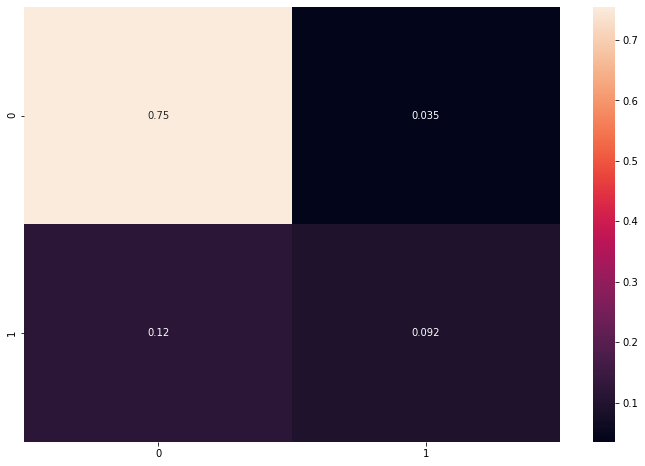

In [27]:
from sklearn.metrics import confusion_matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/ np.sum(cf_matrix), annot = True)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     19709
           1       0.72      0.44      0.55      5256

    accuracy                           0.85     24965
   macro avg       0.79      0.70      0.73     24965
weighted avg       0.84      0.85      0.83     24965



In [30]:
model.evaluate(X_test, y_test)

781/781 [==============================] - 1s 1ms/step - loss: 0.3528 - accuracy: 0.8469


[0.3528020977973938, 0.8468655943870544]